In [1]:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also,
certain attributes of each product and store have been defined. The aim is to build a predictive model and predict 
the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role 

in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to
technical glitches. Hence, it will be required to treat them accordingly. 

SyntaxError: invalid syntax (4081237722.py, line 1)

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize']=[20, 10]

In [5]:
# Import train and test set

train = pd.read_csv("train_bigmartmain.csv")
test = pd.read_csv("test_bigmartmain.csv")

In [7]:
sample=pd.read_csv("sample_submission_bigmart_Samplr.csv")
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [6]:
# Base Model
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                         "Outlet_Identifier": test.Outlet_Identifier,
                         "Item_Outlet_Sales": train.Item_Outlet_Sales.mean()})

In [6]:
solution.to_csv("Basemodel_Reg.csv", index = False) # 1773.8251377790564

In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
# Combined
combined = pd.concat([train, test], ignore_index = True)


In [10]:
combined.shape

(14204, 12)

### Univariate Analysis

In [12]:
combined.select_dtypes(include = np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

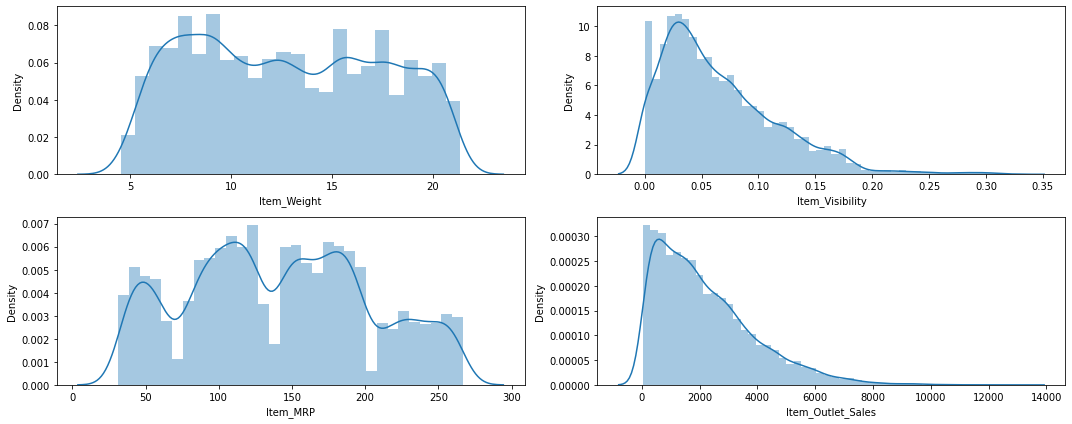

In [17]:
cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

a = 2
b = 2
c = 1
for i in cols:
  plt.subplot(a, b, c)
  sns.distplot(combined.loc[:, i])
  plt.xlabel(i)
  c = c+1

plt.tight_layout()
plt.show()

* Item Weight is uniform in Nature
* Item MRP is a multimodal Data
* Item Outlet Sales is highly Skewed.
* Same goes for Item Visibility

In [18]:
combined.select_dtypes(include = "object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

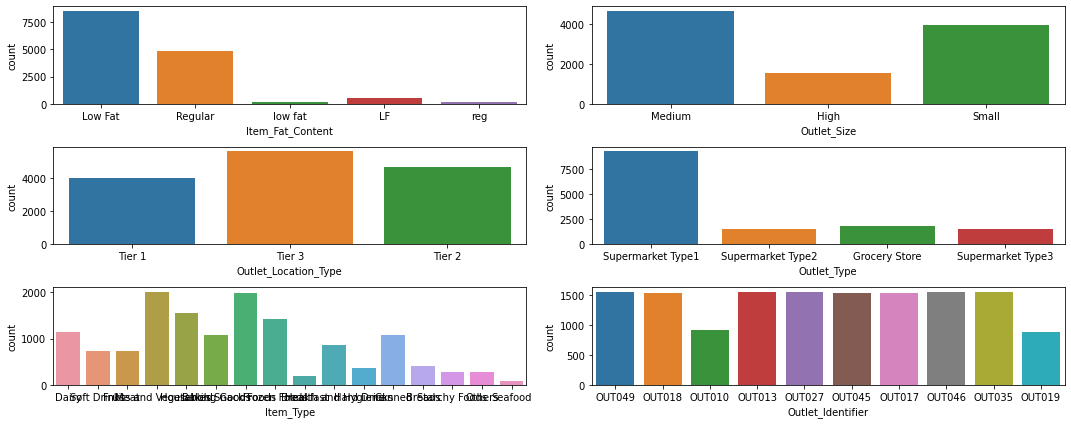

In [23]:
cat_cols = ['Item_Fat_Content', 'Outlet_Size', 
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Type','Outlet_Identifier']

a = 3
b = 2
c = 1
for i in cat_cols:
  plt.subplot(a, b, c)
  sns.countplot(combined.loc[:, i])
  plt.xlabel(i)
  #plt.xticks(rotation = 90)
  c = c+1

plt.tight_layout()
plt.show()

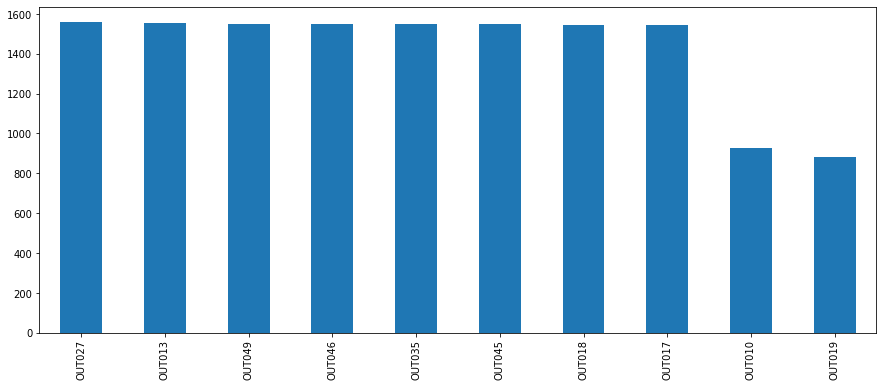

In [25]:
combined.Outlet_Identifier.value_counts().plot(kind = "bar")

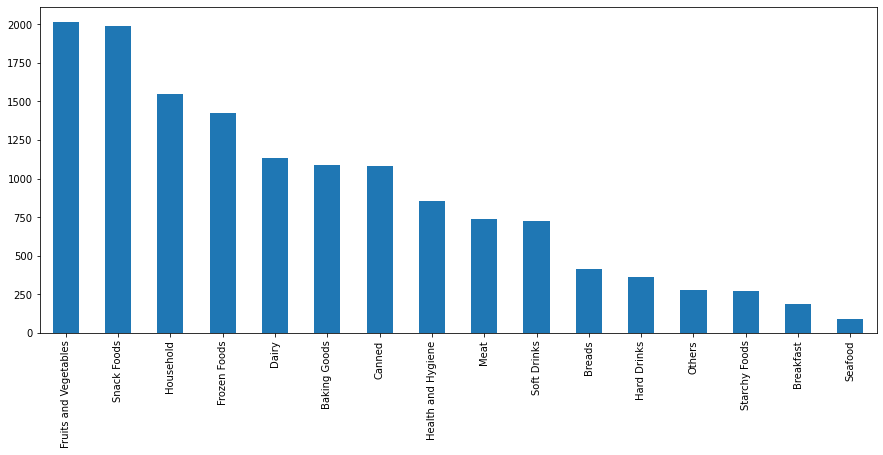

In [26]:
combined.Item_Type.value_counts().plot(kind = "bar")

* Top 5 Selling Items - Fruits and Vegetables, Snacks, Household, Frozen and Dairy

* Out_27 is the most visible outlet in the business. Most Likely the Sales of Outlet 27 will be the highest amongst all

* Only Two Items - Low Fat or Regular
* Most of the Outlets are in Tier 3 Cities and they are all medium size outlets.

### Bivariate Analysis

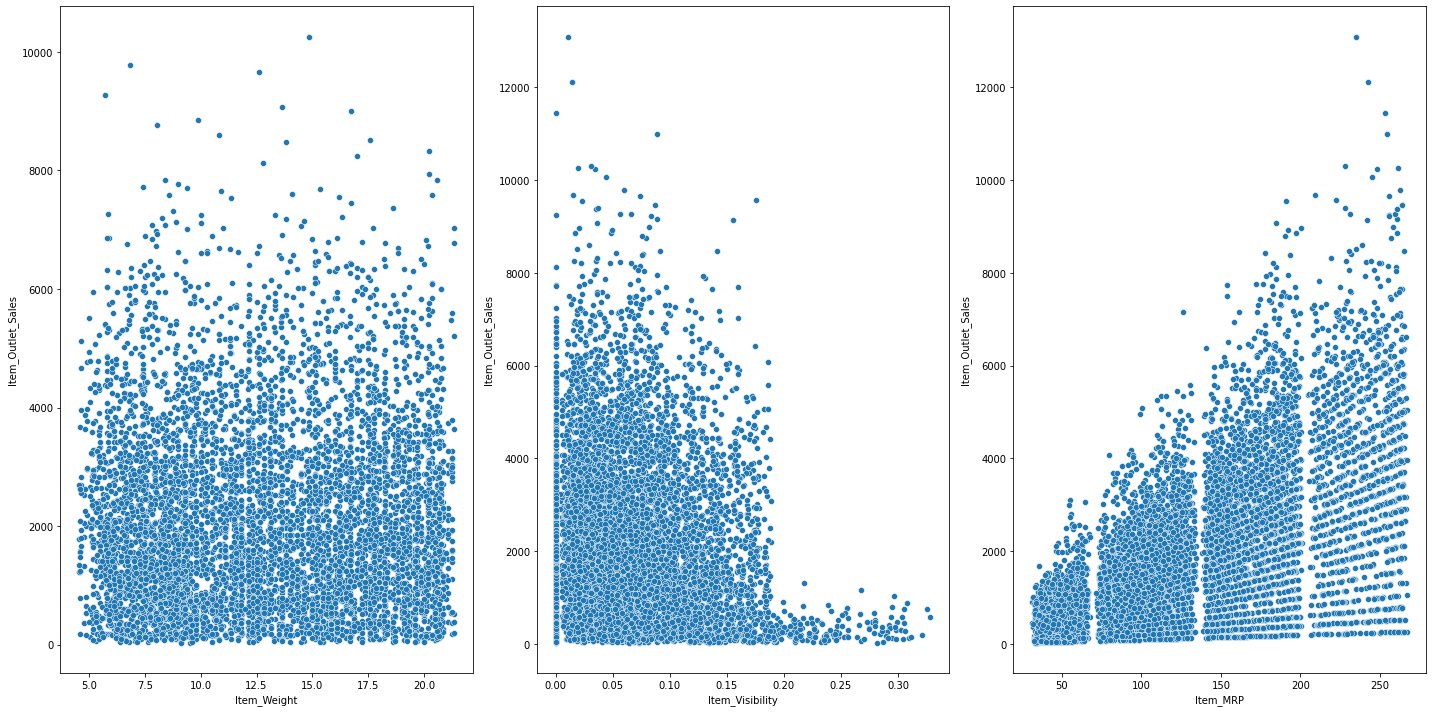

In [39]:
# Num vs Num

cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

a = 1
b = 3
c = 1

for i in cols:
  plt.subplot(a, b, c)
  sns.scatterplot(combined.loc[:, i], combined.Item_Outlet_Sales)
  plt.xlabel(i)
  c = c+1

plt.tight_layout()
plt.show()


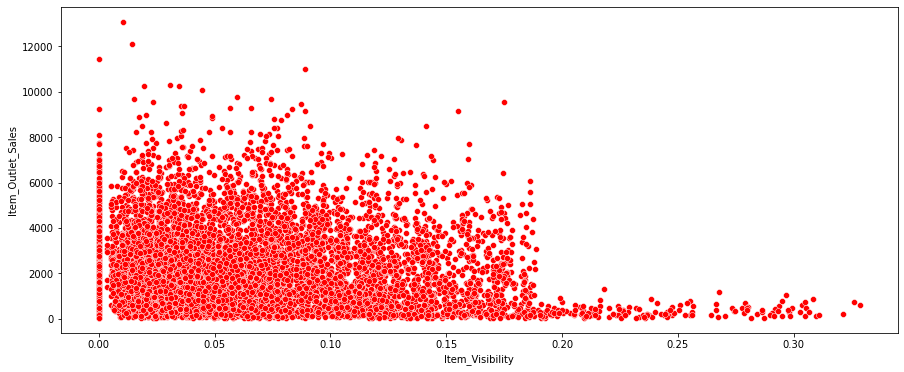

In [31]:
sns.scatterplot(combined.Item_Visibility, combined.Item_Outlet_Sales,
                color = "red")

Item Visibility has lots of 0s which are needed to worked out.

In [33]:
# Item Fat Content
combined.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [34]:
# Replacing it...
combined.Item_Fat_Content.replace(to_replace = ["LF", "low fat", "reg"],
                                  value = ["Low Fat", "Low Fat","Regular"], 
                                  inplace = True)

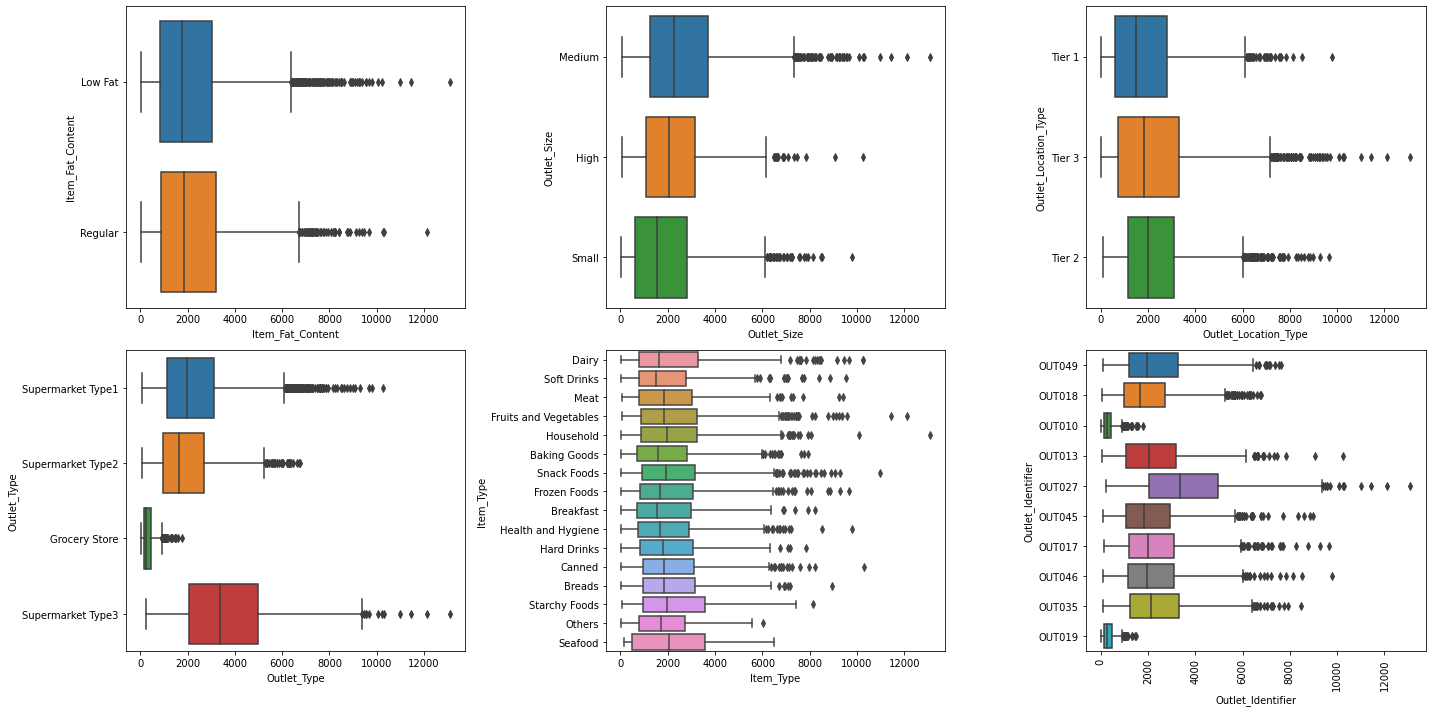

In [41]:
# Cat vs Num
a = 2
b = 3
c = 1

for i in cat_cols:
  plt.subplot(a,b,c)
  sns.boxplot(y = combined.loc[:, i], x = combined.Item_Outlet_Sales)
  plt.xlabel(i)
  c = c+1

plt.xticks(rotation = 90)
plt.tight_layout()

plt.show()

* Low Fat Items have a very high Sales in comparison to Regular Items

* Grocery Store has the lowest Sales and S3 has the highest sales recorded for Outlet Types

* Out027 has the highest Performing Outlet Seen in the Data & the struggling outlets are OU010 and Out019.

* Most of the Sales is coming from Medium Size outlets and city location is Tier3.

### Missing Values

In [42]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [57]:
combined.loc[combined.Item_Weight.isnull(), ].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432


In [56]:
# Loop based Approach
combined.loc[7, 
             "Item_Weight"] = combined.loc[combined.Item_Identifier == "FDP10", 
                                              "Item_Weight"].mean()

In [60]:
# Dictionary Based Approach
dict_x = combined.groupby("Item_Identifier")["Item_Weight"].mean().to_dict()

combined.Item_Weight = combined.Item_Identifier.map(dict_x)

In [62]:
combined.Item_Weight.isnull().sum()


0

In [65]:
# Lambda...

combined["Item_Visibility"] = combined.groupby("Item_Identifier")["Item_Visibility"].apply(lambda x:x.replace(to_replace = 0, 
                                             value= x.median()))

In [73]:
combined.loc[combined.Item_Visibility==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [71]:
# Finding the Item Visibility where the Type = Fruits & Vegetables

combined.loc[combined.Item_Type=="Fruits and Vegetables", 
             "Item_Visibility"].median()

0.058279823

In [72]:
# Replace with above value
combined.Item_Visibility.replace(to_replace = 0,
                                 value = 0.058279823, inplace = True)

In [75]:
# Outlet_Size

combined.groupby("Outlet_Identifier")["Outlet_Size"].value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           1553
OUT018             Medium         1546
OUT019             Small           880
OUT027             Medium         1559
OUT035             Small          1550
OUT046             Small          1550
OUT049             Medium         1550
Name: Outlet_Size, dtype: int64

In [77]:
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Identifier"].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

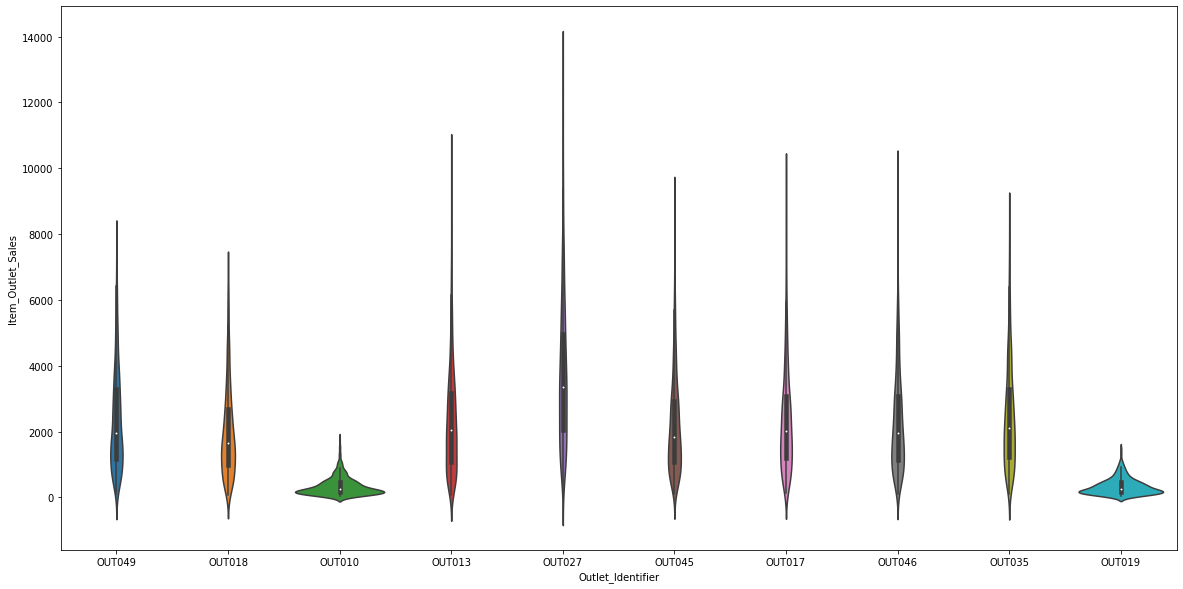

In [79]:
# Sales
sns.violinplot(x = "Outlet_Identifier", y = "Item_Outlet_Sales", 
               data = combined)

In [94]:
combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
OUT017,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648
OUT035,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
OUT045,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
OUT046,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362


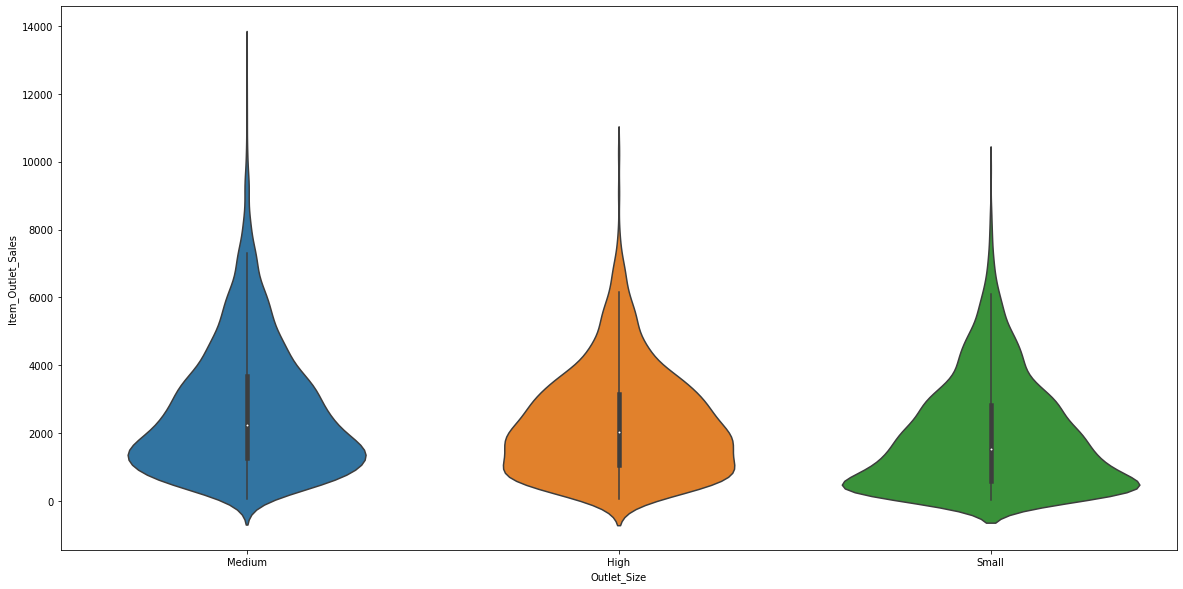

In [80]:
# Outlet Size vs Sales
sns.violinplot(x = "Outlet_Size", y = "Item_Outlet_Sales",
               data = combined)

In [82]:
# Small in Out010
combined.loc[combined.Outlet_Identifier=="OUT010", "Outlet_Size"] = "Small"

In [92]:
# 'OUT045', 'OUT017'
combined.loc[combined.Outlet_Size.isnull(), 
             ["Outlet_Type", "Outlet_Location_Type"]].value_counts()

Outlet_Type        Outlet_Location_Type
Supermarket Type1  Tier 2                  3091
dtype: int64

In [93]:
# Where it is S1 and Type 2 ==> Outlet Size 
combined.loc[(combined.Outlet_Type=="Supermarket Type1") 
& (combined.Outlet_Location_Type=="Tier 2"), "Outlet_Size"].unique()

array([nan, 'Small'], dtype=object)

In [95]:
# Out45==>Out049 and Out017==>Small==>Out035

combined.loc[combined.Outlet_Identifier=='OUT045', "Outlet_Size"]="Medium"

combined.loc[combined.Outlet_Identifier=='OUT017', "Outlet_Size"]="Small"

## Feature Engineering

In [96]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [97]:
# Item Type
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [98]:
perishables = ['Dairy', "Breakfast", 'Meat', "Fruits and Vegetables",
               "Breads", "Seafood"]

In [99]:
def typebadlo(x):
  if x in perishables:
    return("Perishables")
  else:
    return("Non_Perishables")

In [101]:
combined["Item_Type_Cat"] = combined.Item_Type.apply(typebadlo)

In [102]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Perishables
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Non_Perishables


In [105]:
# Extracting frst two letters of ID
ids = []
for i in combined.Item_Identifier:
  ids.append(i[:2])

In [106]:
combined["ItemID_Cat"]=pd.Series(ids)

In [108]:
# Where it is Non Consumable, we impute NonEdible in Item_Fat
combined.loc[combined.ItemID_Cat=="NC", "Item_Fat_Content"]="Non Edible"

In [109]:
# OutletID
combined.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [113]:
high = ['OUT027', 'OUT013']
low = ['OUT019', 'OUT010']

In [117]:
def catbadlo(x):
  if x in high:
    return("High_Perf")
  elif x in low:
    return("Low_Perf")
  else:
    return("Medium_Perf")

In [120]:
combined["Outlet_Perf"] = combined.Outlet_Identifier.apply(catbadlo)

In [122]:
# Calculate the Vintage
combined["Existence_Yr"] = 2013 - combined.Outlet_Establishment_Year

In [124]:
# Drop the Variables
new = combined.drop(["Item_Identifier", "Outlet_Identifier", 
               "Item_Type", "Outlet_Establishment_Year"], axis = 1)

In [126]:
new_train = new.loc[0:train.shape[0]-1, ]
new_test = new.loc[train.shape[0]:, ]

In [129]:
# Dropping  TGT Var from New Test
new_test = new_test.drop("Item_Outlet_Sales", axis = 1)

Whether to use StandardScaler or Robust Scaler???

In [130]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [132]:
X = new_train.drop("Item_Outlet_Sales", axis = 1)
y = new_train.Item_Outlet_Sales

In [134]:
# StandardScaler
sc = StandardScaler()

# Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

#Pipeline
pipe = Pipeline([('sc', sc), ('rf', rf)])

scores = -cross_val_score(estimator = pipe, 
                X = pd.get_dummies(X, drop_first=True),
                y = y, cv = 10, scoring = "neg_mean_squared_error")
print(np.sqrt(scores.mean()))

1140.128116993405


In [135]:
# Robust Scaler
rbs = RobustScaler()

# Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

#Pipeline
pipe = Pipeline([('rbs', rbs), ('rf', rf)])

scores = -cross_val_score(estimator = pipe, 
                X = pd.get_dummies(X, drop_first=True),
                y = y, cv = 10, scoring = "neg_mean_squared_error")
print(np.sqrt(scores.mean()))

1143.3773502328036


In [141]:
# Lets Scale the Data, 'Item_Weight', 'Item_MRP', 'Existence_Yr'
sc = StandardScaler()

X["Item_Weight"]= sc.fit_transform(pd.DataFrame(X.Item_Weight))

In [142]:
new_test["Item_Weight"] = sc.transform(pd.DataFrame(new_test.Item_Weight))

In [143]:
sc = StandardScaler()
X["Item_MRP"]= sc.fit_transform(pd.DataFrame(X.Item_MRP))
new_test["Item_MRP"] = sc.transform(pd.DataFrame(new_test.Item_MRP))

In [144]:
sc = StandardScaler()
X["Existence_Yr"]= sc.fit_transform(pd.DataFrame(X.Existence_Yr))
new_test["Existence_Yr"] = sc.transform(pd.DataFrame(new_test.Existence_Yr))

In [145]:
# Dummify the Data...
dummy_train = pd.get_dummies(X, drop_first = True)
dummy_test = pd.get_dummies(new_test, drop_first = True)

In [158]:
rf = RandomForestRegressor()
pred_rf = rf.fit(dummy_train, y).predict(dummy_test)

In [161]:
# RF Model
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                         "Outlet_Identifier": test.Outlet_Identifier,
                         "Item_Outlet_Sales": pred_rf})
solution.to_csv("RFModel_bigmart.csv", index = False) # 1202.07

In [162]:
# Adaboost
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
ada = AdaBoostRegressor()
gbm = GradientBoostingRegressor()

pred_ada = ada.fit(dummy_train, y).predict(dummy_test)
pred_gbm = gbm.fit(dummy_train, y).predict(dummy_test)

solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                         "Outlet_Identifier": test.Outlet_Identifier,
                         "Item_Outlet_Sales": pred_ada})
solution.to_csv("ADAModel_bigmart.csv", index = False) # 1202.07

In [163]:
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                         "Outlet_Identifier": test.Outlet_Identifier,
                         "Item_Outlet_Sales": pred_gbm})
solution.to_csv("GBMModel_bigmart.csv", index = False) # 1202.07

In [165]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()

pred_lgbm = lgbm.fit(dummy_train, y).predict(dummy_test)

solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                         "Outlet_Identifier": test.Outlet_Identifier,
                         "Item_Outlet_Sales": pred_lgbm})
solution.to_csv("LGBModel_bigmart.csv", index = False) # 1177

In [166]:
solution.describe()

,Item_Outlet_Sales
count,5681.000000
mean,2185.598368
std,1360.790785
min,14.822258
25%,1068.137647
50%,2095.883661
75%,3058.952615
max,7509.232916


In [167]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5, shuffle = True)

lgbm = LGBMRegressor()
pred_model = pd.DataFrame()

n = 5
for i in range(n):
    folds = next(kfold.split(dummy_train)) # Splitting the data in even groups...
    xtrain = dummy_train.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    pred_model[i] = lgbm.fit(xtrain, ytrain).predict(dummy_test)  

In [171]:
lgbm_cv = pred_model.mean(axis=1)

In [172]:
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                         "Outlet_Identifier": test.Outlet_Identifier,
                         "Item_Outlet_Sales": lgbm_cv})
solution.to_csv("LGB_CV_Model_bigmart.csv", index = False) # 1177